In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [6]:
breast_cancer= load_breast_cancer()
X=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
X=X[['mean area', 'mean compactness']]
y=pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y=pd.get_dummies(y, drop_first=True)

In [8]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y, random_state=1)


In [9]:
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(Xtrain,ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

<Axes: xlabel='mean area', ylabel='mean compactness'>

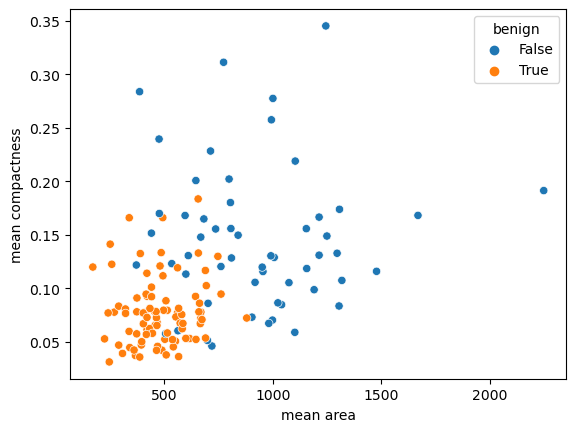

In [12]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=Xtest.join(ytest, how='outer')
)

In [13]:
ypred=knn.predict(Xtest)


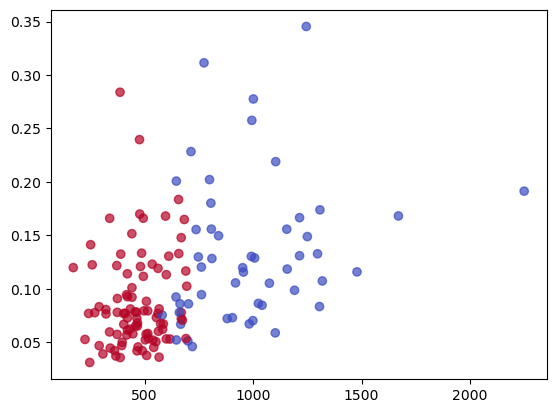

In [14]:
plt.scatter(
    Xtest['mean area'],
    Xtest['mean compactness'],
    c=ypred,
    cmap='coolwarm',
    alpha=0.7
)

In [16]:
confusion_matrix(ytest,ypred)

array([[42, 13],
       [ 9, 79]], dtype=int64)